In [3]:
!pip install catboost

     |████████████████████████████████| 62.9MB 177kB/s eta 0:00:01
     |████████████████████████████████| 20.0MB 34.3MB/s eta 0:00:01     |██████████████████████████████▋ | 19.2MB 34.3MB/s eta 0:00:01
  Found existing installation: numpy 1.14.3
    Uninstalling numpy-1.14.3:
      Successfully uninstalled numpy-1.14.3


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [2]:
data_train = pd.read_csv("/home/ec2-user/SageMaker/train.csv")
data_test = pd.read_csv("/home/ec2-user/SageMaker/test.csv")
data_train.shape

(200000, 202)

In [3]:
data_train.shape

(200000, 202)

In [4]:
data_train.isnull().sum().sum()

0

In [5]:
X_train = data_train.drop(columns=['ID_code','target'])
y_train= data_train['target']
print(X_train.shape,y_train.shape)

(200000, 200) (200000,)


In [6]:
X_test = data_test.drop(columns=['ID_code'])
print(X_test.shape)

(200000, 200)


In [7]:
X_train.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [8]:
train_correlations = X_train.corr()
test_correlations = X_test.corr()
train_correlations = train_correlations.values.flatten()
test_correlations = test_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]
test_correlations = test_correlations[test_correlations != 1]

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


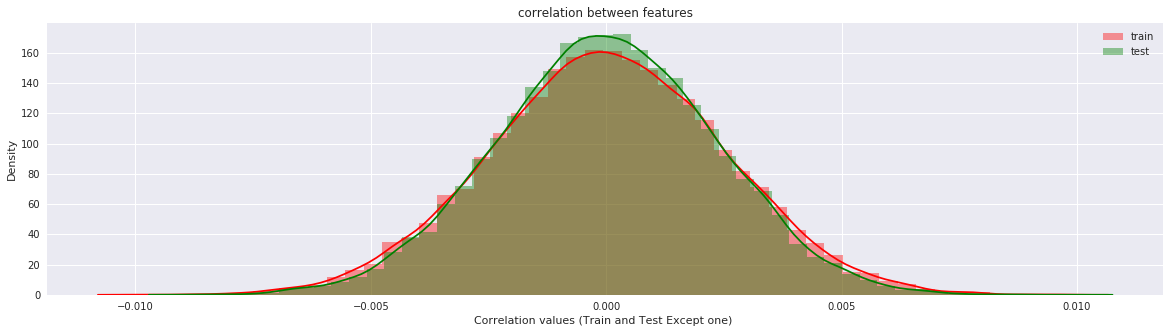

In [9]:
plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Red", label="train")
sns.distplot(test_correlations, color="Green", label="test")
plt.xlabel("Correlation values (Train and Test Except one) ")
plt.ylabel("Density")
plt.title("correlation between features"); 
plt.legend();

In [10]:
idx = features = X_train.columns.values
for df in [X_test, X_train]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)

In [11]:
X_train.shape

(200000, 208)

In [12]:
X_test.shape

(200000, 208)

In [13]:
features =  X_train.columns.values
print(len(features))

208


In [14]:
clf = CatBoostClassifier(loss_function="Logloss",
                           eval_metric="AUC",
                           learning_rate=0.1,
                           iterations=1000,
                           random_seed=42,
                           od_type="Iter",
                           depth=4,
                           early_stopping_rounds=500,
                           border_count=250,
                           l2_leaf_reg = 1,
                           verbose=5000
                          )

In [18]:
folds_cb = StratifiedKFold(n_splits=10, shuffle=False, random_state=44000)
predictions_cb = np.zeros(len(X_test))
oof_cb = np.zeros(len(X_train))

In [19]:
for fold_, (trn_idx, val_idx) in enumerate(folds_cb.split(X_train.values, y_train.values)):
    print("Fold {}".format(fold_))
    X_trainV =  X_train.iloc[trn_idx] 
    y_trainV =  y_train.iloc[trn_idx]
    X_valV =    X_train.iloc[val_idx]
    y_valV = y_train.iloc[val_idx]
    

    model = clf.fit( X_trainV, y_trainV, eval_set=(X_valV, y_valV),use_best_model=True,verbose=200)
    oof_cb[val_idx] = model.predict_proba(X_valV)[:,1]
    print( "Score:{} ".format(roc_auc_score(y_valV, oof_cb[val_idx]) ))
    predictions_cb += model.predict_proba(X_test)[:,1]/folds_cb.n_splits
    

Fold 0
0:	test: 0.5425082	best: 0.5425082 (0)	total: 114ms	remaining: 1m 53s
200:	test: 0.8623739	best: 0.8623739 (200)	total: 20.7s	remaining: 1m 22s
400:	test: 0.8819966	best: 0.8819966 (400)	total: 42s	remaining: 1m 2s
600:	test: 0.8899936	best: 0.8899936 (600)	total: 1m 3s	remaining: 42.1s
800:	test: 0.8930838	best: 0.8930977 (799)	total: 1m 24s	remaining: 21s
999:	test: 0.8951576	best: 0.8951576 (999)	total: 1m 47s	remaining: 0us

bestTest = 0.895157612
bestIteration = 999

Score:0.8951576119734826 
Fold 1
0:	test: 0.5350843	best: 0.5350843 (0)	total: 113ms	remaining: 1m 53s
200:	test: 0.8637425	best: 0.8637425 (200)	total: 20.8s	remaining: 1m 22s
400:	test: 0.8831244	best: 0.8831244 (400)	total: 41.9s	remaining: 1m 2s
600:	test: 0.8901557	best: 0.8901557 (600)	total: 1m 3s	remaining: 42s
800:	test: 0.8936662	best: 0.8936662 (800)	total: 1m 24s	remaining: 21.1s
999:	test: 0.8954992	best: 0.8955023 (996)	total: 1m 46s	remaining: 0us

bestTest = 0.8955023117
bestIteration = 996

Shr

In [20]:
print("CV score: {:<8.5f}".format(roc_auc_score(y_train, oof_cb)))

CV score: 0.89650 


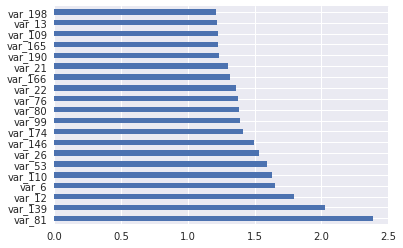

In [21]:
(pd.Series(model.get_feature_importance(), index=X_train.columns)
   .nlargest(20)
   .plot(kind='barh'))

In [22]:
clf.get_feature_importance()

array([1.14738855e+00, 9.91318157e-01, 1.19634026e+00, 9.14603040e-02,
       9.09965989e-02, 6.05553404e-01, 1.64941489e+00, 2.01071898e-02,
       2.29470246e-01, 8.72486289e-01, 0.00000000e+00, 2.56562172e-01,
       1.79631239e+00, 1.22052187e+00, 5.58740779e-02, 1.47895500e-01,
       7.91303140e-02, 2.35120936e-03, 8.35873424e-01, 8.38901363e-02,
       3.43195745e-01, 1.30022847e+00, 1.36240229e+00, 3.34407372e-01,
       4.05061724e-01, 6.56393149e-02, 1.53626088e+00, 0.00000000e+00,
       3.15471977e-01, 3.42018465e-02, 1.02595098e-02, 2.98514480e-01,
       5.17681065e-01, 1.00316130e+00, 1.14176460e+00, 6.45103984e-01,
       6.34547443e-01, 5.83839118e-02, 1.91402519e-02, 1.69505099e-02,
       9.96628212e-01, 0.00000000e+00, 1.88067341e-02, 4.34339015e-01,
       1.07716232e+00, 2.25806178e-01, 0.00000000e+00, 0.00000000e+00,
       4.90203856e-01, 5.21447565e-01, 1.23814058e-01, 4.12143192e-01,
       3.85423539e-01, 1.58923120e+00, 1.49796674e-01, 2.19444552e-01,
      

In [24]:
sub_df = pd.DataFrame({"ID_code":data_test["ID_code"].values})
sub_df["target"] = predictions_cb
sub_df.to_csv("CatBoost_final.csv", index=False)